In [11]:
# This file is trying to relate the time spent relate to number of activations.
# Is it linear, quadratic, something else?

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the power law function
def power_law(x, a, b):
    return a * x**b

In [13]:
# The data is a bunch of (number of activations, seconds spent) pairs
activations = []
ms = []
for line in open("data/logs.txt"):
    activations_str, seconds_str = line.strip().split()
    activations_int = int(activations_str)
    ms_float = float(seconds_str) * 1000.0
    if activations_int == 0 or ms == 0:
        continue
    activations.append(activations_int)
    ms.append(ms_float)
print("Read", len(activations), "nonzero data points")

Read 1600 nonzero data points


Power law function: y = 5.702817e-03 * x^1.052491
R-squared: 0.800641


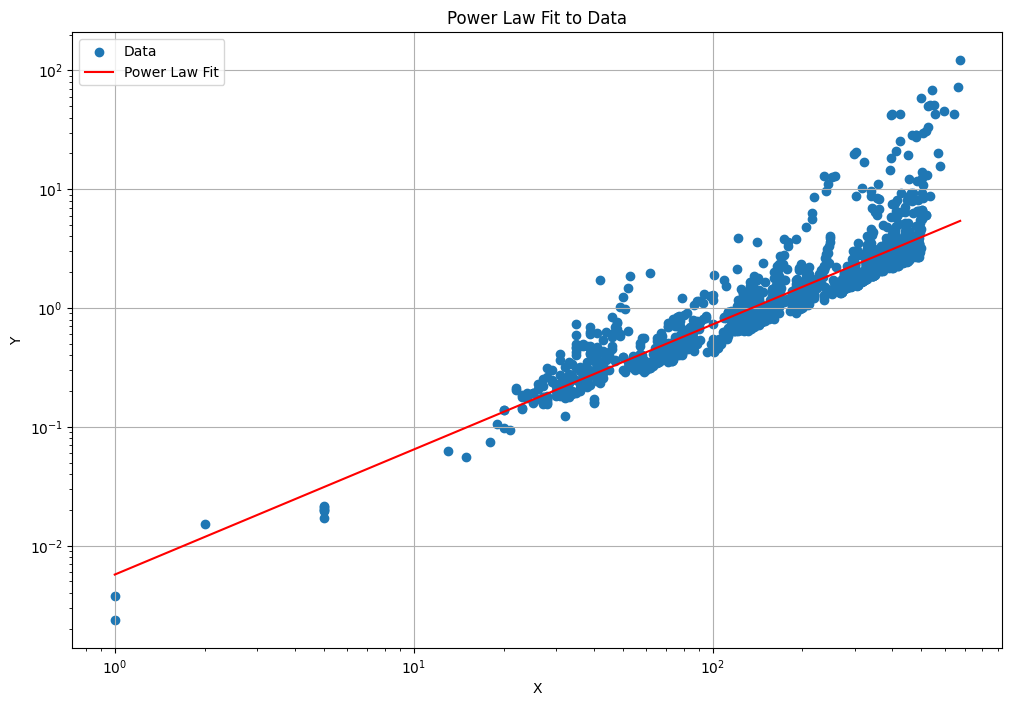

In [14]:
# Hat tip: Claude
x = np.array(activations)
y = np.array(ms)

# Take logarithms
log_x = np.log(x)
log_y = np.log(y)

# Perform linear fit on log-log data
popt, pcov = np.polyfit(log_x, log_y, 1, cov=True)

# Extract parameters
b, log_a = popt
a = np.exp(log_a)

# Calculate R-squared
residuals = log_y - (b * log_x + log_a)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((log_y - np.mean(log_y))**2)
r_squared = 1 - (ss_res / ss_tot)

# Generate points for the fitted curve
x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 1000)
y_fit = power_law(x_fit, a, b)

# Plot the original data and the fitted curve
plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Power Law Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Power Law Fit to Data')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Print the results
print(f"Power law function: y = {a:.6e} * x^{b:.6f}")
print(f"R-squared: {r_squared:.6f}")

plt.show()